# Introduction

**Before** running the code, is **highly recommended** to run the following command, provied in the next cell, by **uncommenting** it. This command will install the **required libraries** for the code to run.

In [2]:
# !pip install -r requirements.txt

Also, make sure to open the notebook as a **workspace** in Visual Studio Code. To do this, first **unzip** the 'SmartPortfolioAnalysis.zip' folder. Then, open the resulting **'SmartPortfolioAnalysis'** folder as a workspace in Visual Studio Code.

# 1. Import libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.optimize as sco
from typing import Tuple
from numba import njit, prange

# 2. Data import and cleaning

## Load the CSV and load them as a Pandas DataFrame.

In [4]:
# Import data frame Commodities
Energy = pd.read_csv('Commodities/Energy.csv', delimiter=';')
Gold = pd.read_csv('Commodities/UBS ETF GOLD H. EUR.csv', delimiter=';') 
Soft = pd.read_csv('Commodities/Soft.csv', delimiter=';') 

# Import data frame Japan
MSCI_J = pd.read_csv('Japan/ISHARES MSCI JAPAN USD ACC.csv', delimiter=';') 
Nikkei_225 = pd.read_csv('Japan/ISHARES NIKKEI 225 JPY ACC.csv', delimiter=';')

# Import data frame Asia-Pacific
MSCI_Asia = pd.read_csv('Pacific/ISHARES MSCI PACIFIC EX-JPN.csv', delimiter=';') 
Pacific_Stocks = pd.read_csv('Pacific/ishares ASIA PACIFIC.csv', delimiter=';')

# Import data frame Emerging Markets
MSCI_EM = pd.read_csv('EM/MSCI EM.csv', delimiter=';')

# Import data frame US
MSCI_US = pd.read_csv('US/Equity/MSCI USA.csv', delimiter=';')
SP500 = pd.read_csv('US/Equity/US S&P 500.csv', delimiter=';')
Nasdaq = pd.read_csv('US/Equity/US NASDAQ 100.csv', delimiter=';')
US_Value = pd.read_csv('US/Equity/US VALUE.csv', delimiter=';')
Russell_2000 = pd.read_csv('US/Equity/INVESCO RUSSELL 2000.csv', delimiter=';') 
US_High_Dividend = pd.read_csv('US/Equity/US_High_Dividend.csv', delimiter=';')
US_GOV_1_3 = pd.read_csv('US/FI/US_gov_1-3.csv', delimiter=';') 
US_GOV_7_10 = pd.read_csv('US/FI/US GOV 710.csv', delimiter=';') 
US_Inflation_Linked = pd.read_csv('US/FI/US GOV IL.csv', delimiter=';')
US_CORPORATE = pd.read_csv('US/FI/ISHARES USD CORP BOND USD D.csv', delimiter=';')

# Import data frame Europe
EUR_STOXX_600 = pd.read_csv('Europe/Equity/EURO_STOXX_600.csv', delimiter=';')
EURO_STOXX_50 = pd.read_csv('Europe/Equity/ISHARES CORE EURO STOXX 50.csv', delimiter=';')
MSCI_EUROPE = pd.read_csv('Europe/Equity/UBS ETF MSCI EUROPE.csv', delimiter=';')
MSCI_EU_VALUE = pd.read_csv('Europe/Equity/UBS ETF MSCI EMU VALUE.csv', delimiter=';')
EUR_STOXX_DIV = pd.read_csv('Europe/Equity/DEKA EURO STOXX SELECT DIVID.csv', delimiter=';')
EUR_GOV_1_3 = pd.read_csv('Europe/FI/ISHARES EURO GOVT BOND 1-3Y.csv', delimiter=';')
EUR_GOV_3_7 = pd.read_csv('Europe/FI/ISHARES EUR GOVT 3-7Y ACC.csv', delimiter=';')
EUR_GOV_7_10 = pd.read_csv('Europe/FI/ISHARES EURO GOVT BOND 7-10Y.csv', delimiter=';')


In [5]:
# Create a dictionary to rename the columns
new_column_names = {
    'Open Price': 'Open',
    'High Price': 'High',
    'Low Price': 'Low',
    'Last Price': 'Close',
    'HMJP LN Equity (EUR) - Volume': 'Volume',
    'CSNKY SW Equity (EUR) - Volume': 'Volume',
    'HMXJ LN Equity (EUR) - Volume': 'Volume',
    'CSEMAS SW Equity (EUR) - Volume': 'Volume',
    'MXFS LN Equity (EUR) - Volume': 'Volume',
    'SXR4 GY Equity - Volume': 'Volume',
    'SXR8 GY Equity (EUR) - Volume': 'Volume',
    'SXRV GY Equity (EUR) - Volume': 'Volume',
    'UBUT GY Equity - Volume': 'Volume',
    'UBU5 GY Equity (EUR) - Volume': 'Volume',
    'RUSG LN Equity (EUR) - Volume': 'Volume',
    'CSBGU3 IM Equity (EUR) - Volume': 'Volume',
    'SXRM GY Equity (EUR) - Volume': 'Volume',
    'IUST GY Equity (EUR) - Volume': 'Volume',
    'ETFSD3E GR Equity (EUR) - Volume': 'Volume',
    'SXXPIEX IM Equity (EUR) - Volume': 'Volume',
    'CSX5 LN Equity (EUR) - Volume': 'Volume',
    'EMVEUA SW Equity (EUR) - Volume': 'Volume',
    'EUREUA SW Equity (EUR) - Volume': 'Volume',
    'LQDA NA Equity (EUR) - Volume': 'Volume',
    'SXRP GR Equity (EUR) - Volume': 'Volume',
    'CSBGE3 SW Equity (EUR) - Volume': 'Volume',
    'SXRQ GR Equity (EUR) - Volume': 'Volume',
    'AUEUAH SW Equity (EUR) - Volume': 'Volume',
    'IPXJ LN Equity (EUR) - Volume': 'Volume',
    'CSJP SW Equity (EUR) - Volume': 'Volume',
    'SR2000 GR Equity (EUR) - Volume': 'Volume',
    'Volume': 'Volume'
}

# Create a list of dataframes
dataframes = [Energy, Gold, Soft, MSCI_J, Nikkei_225, MSCI_Asia, Pacific_Stocks, MSCI_EM, MSCI_US, SP500, Nasdaq, US_Value, Russell_2000, US_High_Dividend, US_GOV_1_3, US_GOV_7_10, US_Inflation_Linked, US_CORPORATE, EUR_STOXX_600, EURO_STOXX_50, MSCI_EUROPE, MSCI_EU_VALUE, EUR_STOXX_DIV, EUR_GOV_1_3, EUR_GOV_3_7, EUR_GOV_7_10]

# Utilize a for loop to rename the columns
for df in dataframes:
    df.rename(columns=new_column_names, inplace=True)

In [6]:
# Utilize a for loop to replace the commas with dots
dataframes = [Energy, Gold, Soft, MSCI_J, Nikkei_225, MSCI_Asia, Pacific_Stocks, MSCI_EM, MSCI_US, SP500, Nasdaq, US_Value, Russell_2000, US_High_Dividend, US_GOV_1_3, US_GOV_7_10, US_Inflation_Linked, US_CORPORATE, EUR_STOXX_600, EURO_STOXX_50, MSCI_EUROPE, MSCI_EU_VALUE, EUR_STOXX_DIV, EUR_GOV_1_3, EUR_GOV_3_7, EUR_GOV_7_10]
for df in dataframes:
    for col in df.columns:
        df[col] = df[col].astype(str).str.replace(',', '.')

In [7]:
# Create a list of dataframes
dataframes = [Energy, Gold, Soft, MSCI_J, Nikkei_225, MSCI_Asia, Pacific_Stocks, MSCI_EM, MSCI_US, SP500, Nasdaq, US_Value, Russell_2000, US_High_Dividend, US_GOV_1_3, US_GOV_7_10, US_Inflation_Linked, US_CORPORATE, EUR_STOXX_600, EURO_STOXX_50, MSCI_EUROPE, MSCI_EU_VALUE, EUR_STOXX_DIV, EUR_GOV_1_3, EUR_GOV_3_7, EUR_GOV_7_10]
# Create a list of columns to convert
Convertible_columns = ['Open', 'High', 'Low', 'Close']

# Implement a for loop to convert the columns to numeric
for df in dataframes:
    for col in df.columns:
        if col in Convertible_columns:
            df[col] = pd.to_numeric(df[col], errors='coerce').round(4)

# Implement a for loop to convert the volume column to numeric integers
for df in dataframes:
    df['Volume'] = pd.to_numeric(df['Volume'], errors='coerce').fillna(0).astype(int)


In [8]:
from datetime import datetime

def convert_dates_to_iso8601(dataframes, date_column='Date'):
    """
    Converts the specified date column of each DataFrame in the given list to ISO 8601 format (YYYY-MM-DD).

    Parameters:
    dataframes (list): A list of pandas DataFrames to process.
    date_column (str, optional): The name of the column to convert. Defaults to 'Date'.

    Returns:
    None: The function modifies the DataFrames in-place and does not return anything.
    """
    for df in dataframes:
        if date_column in df.columns:
            # Convert the 'Date' column to datetime
            df[date_column] = pd.to_datetime(df[date_column], errors='coerce')
            # Format the 'Date' column to ISO 8601 format (YYYY-MM-DD)
            df[date_column] = df[date_column].dt.strftime('%Y-%m-%d')

# List of DataFrames
dataframes = [Energy, Gold, Soft, MSCI_J, Nikkei_225, MSCI_Asia, Pacific_Stocks, MSCI_EM, MSCI_US, SP500, Nasdaq, US_Value, Russell_2000, US_High_Dividend, US_GOV_1_3, US_GOV_7_10, US_Inflation_Linked, US_CORPORATE, EUR_STOXX_600, EURO_STOXX_50, MSCI_EUROPE, MSCI_EU_VALUE, EUR_STOXX_DIV, EUR_GOV_1_3, EUR_GOV_3_7, EUR_GOV_7_10]

# Convert all 'Date' columns to ISO 8601 format
convert_dates_to_iso8601(dataframes)

/tmp/ipykernel_154068/1571471450.py:17: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df[date_column] = pd.to_datetime(df[date_column], errors='coerce')
/tmp/ipykernel_154068/1571471450.py:17: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df[date_column] = pd.to_datetime(df[date_column], errors='coerce')
/tmp/ipykernel_154068/1571471450.py:17: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df[date_column] = pd.to_datetime(df[date_column], errors='coerce')
/tmp/ipykernel_154068/1571471450.py:17: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence thi

## Merge the Dataframes

In [9]:
# List of DataFrames and their corresponding names
dataframes = [Energy, Gold, Soft, MSCI_J, Nikkei_225, MSCI_Asia, Pacific_Stocks, MSCI_EM, MSCI_US,
              SP500, Nasdaq, US_Value, Russell_2000, US_High_Dividend, US_GOV_1_3, US_GOV_7_10,
              US_Inflation_Linked, US_CORPORATE, EUR_STOXX_600, EURO_STOXX_50, MSCI_EUROPE,
              MSCI_EU_VALUE, EUR_STOXX_DIV, EUR_GOV_1_3, EUR_GOV_3_7, EUR_GOV_7_10]

df_names = ['Energy', 'Gold', 'Soft', 'MSCI_J', 'Nikkei_225', 'MSCI_Asia', 'Pacific_Stocks', 'MSCI_EM', 'MSCI_US',
            'SP500', 'Nasdaq', 'US_Value', 'Russell_2000', 'US_High_Dividend', 'US_GOV_1_3', 'US_GOV_7_10',
            'US_Inflation_Linked', 'US_CORPORATE', 'EUR_STOXX_600', 'EURO_STOXX_50', 'MSCI_EUROPE',
            'MSCI_EU_VALUE', 'EUR_STOXX_DIV', 'EUR_GOV_1_3', 'EUR_GOV_3_7', 'EUR_GOV_7_10']

# Create an empty dictionary to store the DataFrames with 'Date' as the index
etf_data = {}

# Ensure all Date columns are converted to datetime and set as index
for df, name in zip(dataframes, df_names): # Iterate over the DataFrames and their names
    df['Date'] = pd.to_datetime(df['Date'], errors='coerce') # Convert 'Date' column to datetime
    etf_data[name] = df.set_index('Date') # Set 'Date' as the index and store in the dictionary

# Merge all DataFrames into a single DataFrame based on the 'Date' index
merged_ETF_data = pd.concat(etf_data.values(), axis=1, keys=etf_data.keys()) # Merge the DataFrames

# Handling possible duplication in Date column by resetting index
merged_ETF_data = merged_ETF_data.reset_index() # Reset the index

# Flatten the column hierarchy and handle duplicate column names
merged_ETF_data.columns = ['_'.join(col).strip() if col[0] != 'Date' else col[0] for col in merged_ETF_data.columns.values] # Flatten the column hierarchy

# Rename the 'Date' column if needed (in case of any suffix added)
merged_ETF_data = merged_ETF_data.rename(columns={col: 'Date' for col in merged_ETF_data.columns if 'Date' in col}) # Rename the 'Date' column

# Print the first few rows of the merged DataFrame
merged_ETF_data.head()

,Date,Energy_Open,Energy_High,Energy_Low,Energy_Close,Energy_Volume,Gold_Open,Gold_High,Gold_Low,Gold_Close,...,EUR_GOV_3_7_Open,EUR_GOV_3_7_High,EUR_GOV_3_7_Low,EUR_GOV_3_7_Close,EUR_GOV_3_7_Volume,EUR_GOV_7_10_Open,EUR_GOV_7_10_High,EUR_GOV_7_10_Low,EUR_GOV_7_10_Close,EUR_GOV_7_10_Volume
0,2024-03-29,3.4345,3.5075,3.2700,3.4440,139201,55.60,60.18,55.60,60.18,...,125.62,127.29,125.430,126.72,638,145.23,148.360,144.960,147.44,0
1,2024-02-29,3.4405,3.4405,3.2700,3.3930,84162,55.56,55.96,53.96,55.43,...,127.23,127.72,125.250,125.82,243,147.61,148.490,144.415,145.81,538
2,2024-01-31,3.2730,3.4650,3.2670,3.4125,258880,56.14,56.14,54.63,55.79,...,128.04,128.04,125.795,127.38,164,148.44,149.650,145.505,147.92,1470
3,2023-12-29,3.4940,3.5330,3.2060,3.2980,186964,55.69,56.70,53.79,56.23,...,124.66,128.59,124.565,127.69,1515,142.98,150.610,142.960,148.90,4300
4,2023-11-30,3.9785,3.9980,3.4465,3.4735,169786,54.17,55.82,52.92,55.58,...,122.36,125.24,122.175,124.59,200,138.38,143.785,137.960,142.97,15281


## Nan Values Check

In [10]:
# Check for NaN values in the DataFrame
nan_in_df = merged_ETF_data.isna().any()

# Print if there are any NaN values in the DataFrame
if nan_in_df.any():
    print("There are NaN values in the DataFrame.")
    
    # Print the names of the DataFrames that contain NaN values
    for df_name, df in zip(df_names, dataframes):
        if df.isna().any().any():
            print(f"{df_name} contains NaN values.")
else:
    print("There are no NaN values in the DataFrame.")

There are no NaN values in the DataFrame.


In [11]:
# List of DataFrames
dataframes = [Energy, Gold, Soft, MSCI_J, Nikkei_225, MSCI_Asia, Pacific_Stocks, MSCI_EM, MSCI_US, SP500, Nasdaq, US_Value, Russell_2000, US_High_Dividend, US_GOV_1_3, US_GOV_7_10, US_Inflation_Linked, US_CORPORATE, EUR_STOXX_600, EURO_STOXX_50, MSCI_EUROPE, MSCI_EU_VALUE, EUR_STOXX_DIV, EUR_GOV_1_3, EUR_GOV_3_7, EUR_GOV_7_10]

# Create a list of DataFrame names
df_names = ['Energy', 'Gold', 'Soft', 'MSCI_J', 'Nikkei_225', 'MSCI_Asia', 'Pacific_Stocks', 'MSCI_EM', 'MSCI_US', 'SP500', 'Nasdaq', 'US_Value', 'Russell_2000', 'US_High_Dividend', 'US_GOV_1_3', 'US_GOV_7_10', 'US_Inflation_Linked', 'US_CORPORATE', 'EUR_STOXX_600', 'EURO_STOXX_50', 'MSCI_EUROPE', 'MSCI_EU_VALUE', 'EUR_STOXX_DIV', 'EUR_GOV_1_3', 'EUR_GOV_3_7', 'EUR_GOV_7_10']
# Create an empty dictionary to store the 'Close' columns
close_data = {} 

# Iterate over each DataFrame and store the 'Close' column in the dictionary with its name as the key
for df, name in zip(dataframes, df_names): # Iterate over the DataFrames and their names
    close_data[name] = df[['Date', 'Close']].set_index('Date') # Store the 'Close' column with 'Date' as the index

# Merge all 'Close' columns into a single DataFrame based on the 'Date' index
merged_close_data = pd.concat(close_data.values(), axis=1, keys=close_data.keys()) # Merge the 'Close' columns. pd.concat() is used to concatenate the 'Close' columns. Axis=1 is used to concatenate the columns. keys=close_data.keys() is used to set the keys of the dictionary as the column names.

# Reset the index
merged_close_data = merged_close_data.reset_index() # merged_close_data.reset_index() is used to reset the index of the DataFrame.

# Rename the columns using the DataFrame names
merged_close_data.columns = ['Date'] + df_names

# Print the first few rows of the merged DataFrame
merged_close_data.head()

merged_close_data.to_csv('merged_close_data.csv', index=False)

# 3. Correlation Analysis

In [12]:
# Read the CSV file
df = pd.read_csv('merged_close_data.csv', parse_dates=['Date'], index_col='Date')

# Reverse the order of the DataFrame
df = df.iloc[::-1]

# Calculate monthly returns
monthly_returns = df.pct_change()

# Calculate the correlation matrix
corr_matrix = monthly_returns.corr()

# Calculate annualized returns
periods_per_year = 12
annualized_returns = (1 + monthly_returns.mean()) ** periods_per_year - 1

# Calculate annualized volatility
annualized_volatility = monthly_returns.std() * np.sqrt(periods_per_year)

# Calculate risk-free rate (assuming a constant annual risk-free rate of 2%)
risk_free_rate = 0.02

# Calculate excess returns
excess_returns = monthly_returns - risk_free_rate / periods_per_year

# Calculate Sharpe Ratio
sharpe_ratio = excess_returns.mean() / excess_returns.std() * np.sqrt(periods_per_year)

# Calculate downside returns
target_return = 0
downside_returns = excess_returns.copy()
downside_returns[downside_returns > target_return] = 0

# Calculate Sortino Ratio
sortino_ratio = excess_returns.mean() / downside_returns.std() * np.sqrt(periods_per_year)

# Print the results
results = pd.DataFrame({
    'Annualized Returns': annualized_returns,
    'Annualized Volatility': annualized_volatility,
    'Sharpe Ratio': sharpe_ratio,
    'Sortino Ratio': sortino_ratio
})

In [13]:
results

,Annualized Returns,Annualized Volatility,Sharpe Ratio,Sortino Ratio
Energy,-0.019180,0.277756,-0.141674,-0.218637
Gold,0.019822,0.144711,-0.002461,-0.004424
Soft,0.011533,0.186767,-0.045658,-0.085224
MSCI_J,0.098813,0.132301,0.563875,1.058801
Nikkei_225,0.116281,0.145585,0.621687,1.182529
MSCI_Asia,0.039343,0.149928,0.124401,0.200474
Pacific_Stocks,0.072328,0.146211,0.342216,0.578738
MSCI_EM,0.052564,0.137659,0.227651,0.377277
MSCI_US,0.163247,0.136943,0.965160,1.805292
SP500,0.165891,0.135073,0.995547,1.876124


In [14]:
corr_matrix.to_csv('corr_matrix.csv')

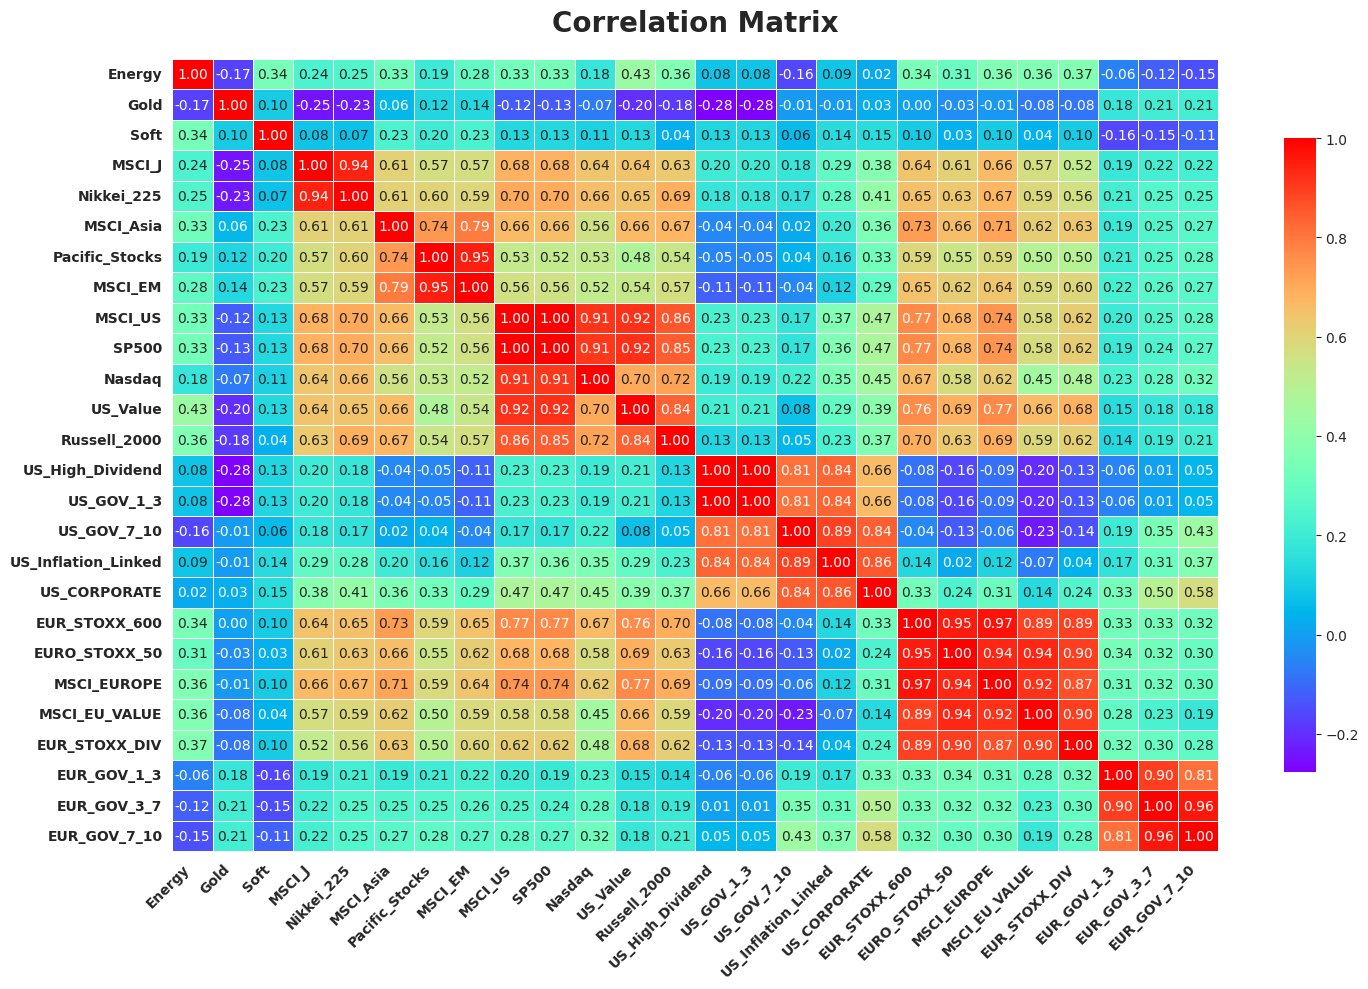

In [15]:
# Defining plot style
sns.set_style("whitegrid")
plt.figure(figsize=(15,10), dpi=100, facecolor='w', edgecolor='k')    
corr_matrix = sns.heatmap(corr_matrix, cmap="rainbow", annot=True, fmt=".2f",
                         linewidths=0.5, linecolor='white',
                         annot_kws={"size": 10}, cbar_kws={"shrink": 0.8})

# Adding title with more visibility
plt.title("Correlation Matrix", fontsize=20, pad=20, fontweight='bold')

# Improving aesthetics
plt.xticks(fontsize=10, rotation=45, ha='right', fontweight='bold')
plt.yticks(fontsize=10, rotation=0, fontweight='bold')
plt.tight_layout()

# Show the plot
plt.show()

## Drop Highly correlted ETFs

In [16]:
def load_data(merged_close_data_path, corr_matrix_path):
    """
    Load CSV data into pandas DataFrames.
    
    Parameters:
    merged_close_data_path (str): Path to the merged_close_data.csv
    corr_matrix_path (str): Path to the corr_matrix.csv
    
    Returns:
    pd.DataFrame: DataFrame containing the merged close data
    pd.DataFrame: DataFrame containing the correlation matrix
    """
    try:
        merged_close_data = pd.read_csv(merged_close_data_path, index_col=0)
        corr_matrix = pd.read_csv(corr_matrix_path, index_col=0)
        return merged_close_data, corr_matrix
    except Exception as e:
        print(f"Error loading data: {e}")
        raise

def analyze_and_drop_highly_correlated(corr_matrix, threshold=0.8):
    """
    Analyze the correlation matrix and identify ETFs with high correlation.
    
    Parameters:
    corr_matrix (pd.DataFrame): The correlation matrix
    threshold (float): The correlation threshold for dropping ETFs
    
    Returns:
    list: List of ETFs to drop
    """
    # Identify pairs of ETFs with correlation above the threshold
    to_drop = set()
    for i in range(len(corr_matrix.columns)):
        for j in range(i + 1, len(corr_matrix.columns)):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                to_drop.add(corr_matrix.columns[j])
    
    return list(to_drop)

def create_final_dataframe(merged_close_data, to_drop):
    """
    Create the final DataFrame by dropping the specified ETFs.
    
    Parameters:
    merged_close_data (pd.DataFrame): The original merged close data
    to_drop (list): List of ETFs to drop
    
    Returns:
    pd.DataFrame: The final DataFrame after dropping the ETFs
    """
    merged_close_data_final = merged_close_data.drop(columns=to_drop)
    return merged_close_data_final

def main():
    # Define file paths
    merged_close_data_path = "merged_close_data.csv"
    corr_matrix_path = "corr_matrix.csv"
    
    # Load data
    merged_close_data, corr_matrix = load_data(merged_close_data_path, corr_matrix_path)
    
    # Analyze correlation matrix and identify ETFs to drop
    to_drop = analyze_and_drop_highly_correlated(corr_matrix, threshold=0.8)
    
    # Create final DataFrame
    merged_close_data_final = create_final_dataframe(merged_close_data, to_drop)
    
    # Output the results by saving to a new CSV file
    merged_close_data_final.to_csv("merged_close_data_final.csv", index=True)
    print("Final DataFrame saved to 'merged_close_data_final.csv'")

if __name__ == "__main__":
    main()

Final DataFrame saved to 'merged_close_data_final.csv'


In [17]:
# Read the CSV file
df2 = pd.read_csv('merged_close_data_final.csv', parse_dates=['Date'], index_col='Date')

# Reverse the order of the DataFrame
df2 = df2.iloc[::-1]

# Calculate monthly returns
monthly_returns2 = df2.pct_change()

# Calculate the correlation matrix
corr_matrix_final = monthly_returns2.corr()

# Calculate annualized returns
periods_per_year = 12
annualized_returns2 = (1 + monthly_returns2.mean()) ** periods_per_year - 1

# Calculate annualized volatility
annualized_volatility2 = monthly_returns2.std() * np.sqrt(periods_per_year)

# Calculate risk-free rate (assuming a constant annual risk-free rate of 2%)
risk_free_rate = 0.02

# Calculate excess returns
excess_returns2 = monthly_returns2 - risk_free_rate / periods_per_year

# Calculate Sharpe Ratio
sharpe_ratio2 = excess_returns2.mean() / excess_returns2.std() * np.sqrt(periods_per_year)

# Calculate downside returns
target_return = 0
downside_returns2 = excess_returns2.copy()
downside_returns[downside_returns2 > target_return] = 0

# Calculate Sortino Ratio
sortino_ratio2 = excess_returns2.mean() / downside_returns2.std() * np.sqrt(periods_per_year)

# Print the results
results2 = pd.DataFrame({
    'Annualized Returns': annualized_returns2,
    'Annualized Volatility': annualized_volatility2,
    'Sharpe Ratio': sharpe_ratio2,
    'Sortino Ratio': sortino_ratio2
})

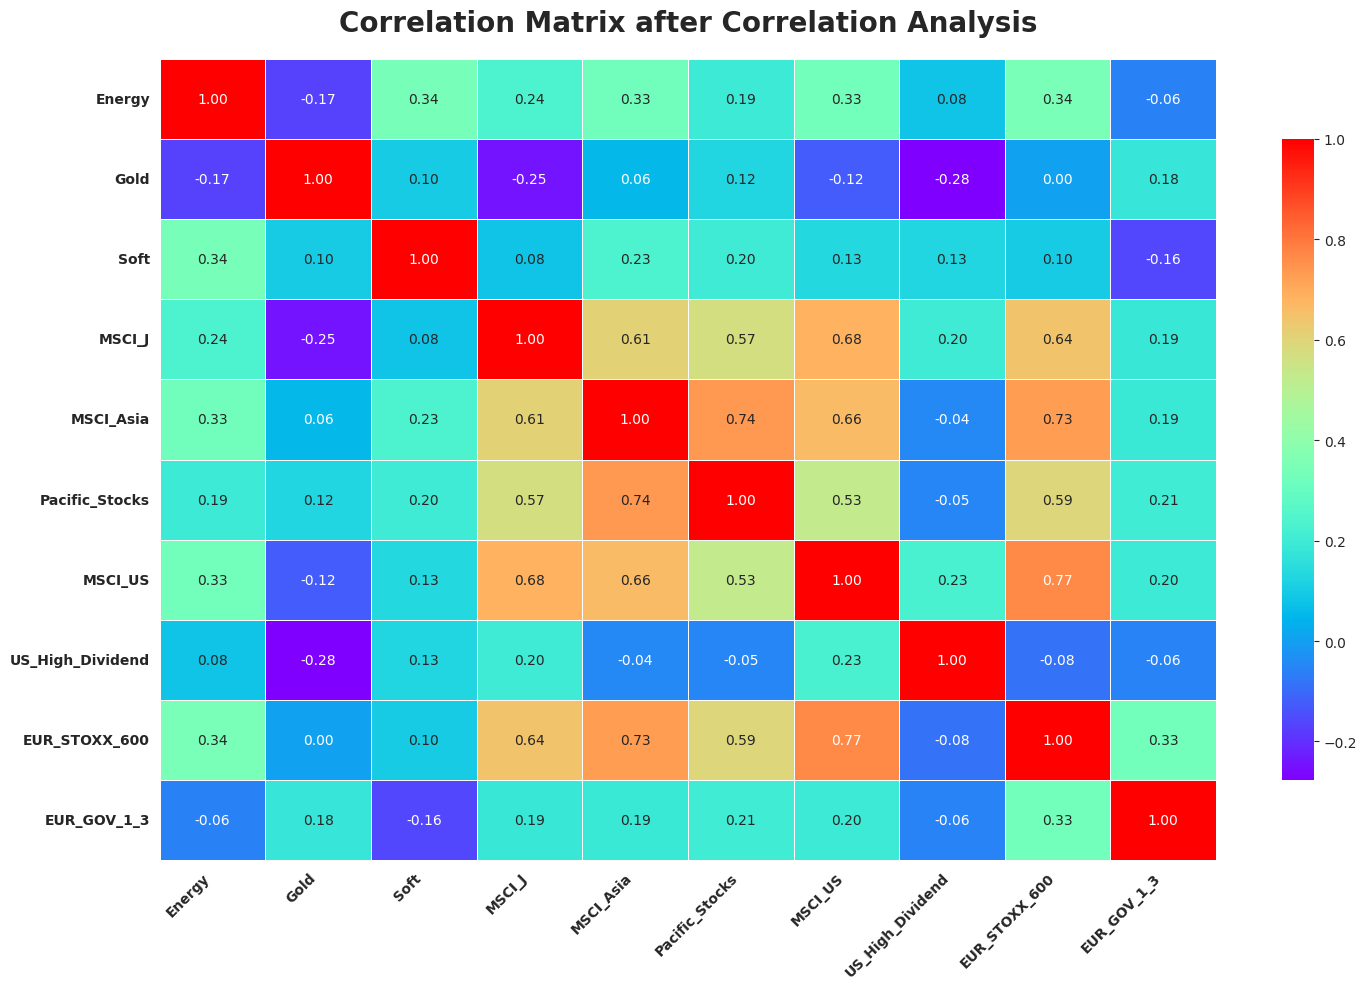

In [18]:
# Defining plot style
sns.set_style("whitegrid")
plt.figure(figsize=(15,10), dpi=100, facecolor='w', edgecolor='k')    
corr_matrix_final = sns.heatmap(corr_matrix_final, cmap="rainbow", annot=True, fmt=".2f",
                         linewidths=0.5, linecolor='white',
                         annot_kws={"size": 10}, cbar_kws={"shrink": 0.8})

# Adding title with more visibility
plt.title("Correlation Matrix after Correlation Analysis", fontsize=20, pad=20, fontweight='bold')

# Improving aesthetics
plt.xticks(fontsize=10, rotation=45, ha='right', fontweight='bold')
plt.yticks(fontsize=10, rotation=0, fontweight='bold')
plt.tight_layout()

# Show the plot
plt.show()

# 4. Risk Free Calculation

In [19]:
# Loading Risk-Free Rate Data from CSV
Countries_RF = pd.read_csv('Risk_Free.csv', delimiter=';')

for col in Countries_RF.columns[1:]:
    Countries_RF[col] = Countries_RF[col].astype(str).str.replace(',', '.')
    Countries_RF[col] = pd.to_numeric(Countries_RF[col], errors='coerce').round(2)

for dates in Countries_RF['Date']:
    Countries_RF = Countries_RF.astype({'Date': 'string'})
    Countries_RF = Countries_RF.astype({'Date': 'datetime64[ns]'})

# Transform Country_RF as a data frame with 'Date' as the index
Countries_RF = Countries_RF.set_index('Date')

Countries_RF.head()

,Eurozone,US,China,Japan,UK,Australia
Date,,,,,,
2024-03-29,0.02,0.04,0.02,0.01,0.04,0.04
2024-02-29,0.02,0.04,0.02,0.01,0.04,0.04
2024-01-31,0.02,0.04,0.02,0.01,0.04,0.04
2023-12-29,0.02,0.04,0.03,0.01,0.04,0.04
2023-11-30,0.02,0.04,0.03,0.01,0.04,0.04


In [20]:
# Create an empty list to store the country names
names = []

# Extract the country names
for col in Countries_RF.columns[1:]:
    name = col.split(' ')[0]
    names.append(name)

# Create a list to store the means of the risk-free rates
means = []

# Calculate the mean of the risk-free rates for each country
for col in Countries_RF.columns[1:]:
    mean = Countries_RF[col].mean()
    means.append(mean)

RF_Country_means = pd.DataFrame({'Country':names, 'RF Mean':means})

# Calculate the mean of the risk-free rates for the Eurozone and the UK
Europe_UK_m = RF_Country_means[RF_Country_means['Country'].isin(['Eurozone','UK'])]['RF Mean'].mean()
China_Australia_m = RF_Country_means[RF_Country_means['Country'].isin(['China','Australia'])]['RF Mean'].mean()

# Create data frames for the Eurozone and the UK, and China and Australia
Europe_df = pd.DataFrame({'Country':'Europe', 'RF Mean':Europe_UK_m}, index=[0])
Asia_Pacific_df = pd.DataFrame({'Country':'China', 'RF Mean':China_Australia_m}, index=[0])

# Drop the Eurozone, UK, China, and Australia from the RF_Country_means DataFrame
RF_Country_means = RF_Country_means[~RF_Country_means['Country'].isin(['Eurozone','UK','China','Australia'])]

# Concatenate the RF_Country_means DataFrame with the new data frames
RF_Country_means = pd.concat([RF_Country_means, Europe_df, Asia_Pacific_df], ignore_index=True)

# Rename the countries
RF_Country_means = RF_Country_means.replace({'Country': {'Europe': 'Europe', 'China': 'Asia_Pacific', 'US':'USA'}})

In [21]:
merged_close_data_final = pd.read_csv('merged_close_data_final.csv', parse_dates=['Date'], index_col='Date')

# Create a list of ETF names
name_ETFs = []

# Assign the region to each ETF
for col in merged_close_data_final.columns:
    if col in ['EUR_GOV_1_3', 'EUR_STOXX_600']:
        name_ETFs.append('Europe')
    elif col in ['MSCI_Asia', 'Pacific_Stocks']:
        name_ETFs.append('Asia_Pacific')
    elif col == 'MSCI_J':
        name_ETFs.append('Japan')
    elif col in ['MSCI_US', 'US_High_Dividend']:
        name_ETFs.append('USA')

# Create a data frame with the ETF names
name_ETFs = pd.DataFrame({'Country': name_ETFs})

In [22]:
# Calculate the frequency of each region
Country_frequence = name_ETFs['Country'].value_counts()

# Create a data frame with the frequency of each region
Country_frequence =pd.DataFrame(Country_frequence)

# Reset the index
Country_frequence.reset_index(inplace=True)

# Rename the column name into 'Frequency'
Country_frequence.rename(columns={'count': 'Frequency'}, inplace=True)

# Merge the RF_Country_means and Country_frequence data frames
RF_Country_means = pd.merge(RF_Country_means, Country_frequence, how='left')

In [23]:
# Calculate the weights for each country as the product of the mean risk-free rate and the frequency
RF_Country_means['Weights'] = RF_Country_means['RF Mean'] * RF_Country_means['Frequency']

# Calculate the Risk-Free Rate as the sum of the weights divided by the sum of the frequencies
Risk_Free_Rate_calculated = RF_Country_means['Weights'].sum() / RF_Country_means['Frequency'].sum()

# Round the Risk-Free Rate to 5 decimal places
Risk_Free_Rate_calculated = round(Risk_Free_Rate_calculated, 5)

# Print the calculated Risk-Free Rate
print("The calculated Risk-Free Rate is:", Risk_Free_Rate_calculated)

The calculated Risk-Free Rate is: 0.02073


# 5. Portfolio Optimization

In [24]:
# Read the CSV file
df2 = pd.read_csv('merged_close_data_final.csv', parse_dates=['Date'], index_col='Date')

# Reverse the order of the DataFrame
df2 = df2.iloc[::-1]

# Calculate monthly returns
monthly_returns2 = df2.pct_change().dropna()

# Calculate the mean and covariance of returns
mean_returns = monthly_returns2.mean()
cov_matrix = monthly_returns2.cov()

# Define the number of assets
num_assets = len(mean_returns)

# Define the risk-free rate (assuming a constant annual risk-free rate of 2%)
risk_free_rate = Risk_Free_Rate_calculated  # Associated with the calculated Risk-Free Rate
periods_per_year = 12
risk_free_rate_periodic = (1 + risk_free_rate) ** (1 / periods_per_year) - 1

def portfolio_performance(weights: np.ndarray, mean_returns: np.ndarray, cov_matrix: np.ndarray) -> Tuple[float, float]:
    """
    Calculate the performance of a portfolio.

    Parameters:
    weights (numpy.ndarray): The weights of the assets in the portfolio.
    mean_returns (numpy.ndarray): The mean returns of the assets.
    cov_matrix (numpy.ndarray): The covariance matrix of the asset returns.

    Returns:
    std_dev (float): The standard deviation (risk) of the portfolio.
    returns (float): The total returns of the portfolio.
    """
    returns = np.sum(mean_returns * weights) * periods_per_year
    std_dev = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights))) * np.sqrt(periods_per_year)
    return std_dev, returns

def negative_sharpe_ratio(weights: np.ndarray, mean_returns: np.ndarray, cov_matrix: np.ndarray, risk_free_rate: float) -> float:
    """
    Calculate the negative Sharpe Ratio of a portfolio.

    Parameters:
    weights (numpy.ndarray): The weights of the assets in the portfolio.
    mean_returns (numpy.ndarray): The mean returns of the assets.
    cov_matrix (numpy.ndarray): The covariance matrix of the asset returns.
    risk_free_rate (float): The risk-free rate of return.

    Returns:
    negative_sharpe_ratio (float): The negative Sharpe Ratio of the portfolio.
    """
    p_var, p_ret = portfolio_performance(weights, mean_returns, cov_matrix)
    return -(p_ret - risk_free_rate) / p_var

# Constraints: sum of weights is 1
constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
# Bounds: weights can range from -1 to 1 (allowing short selling)
bounds = tuple((-1, 1) for asset in range(num_assets))

# Initial guess (equal distribution)
init_guess = num_assets * [1. / num_assets]

# Optimize for maximum Sharpe Ratio
opt_sharpe = sco.minimize(negative_sharpe_ratio, init_guess, args=(mean_returns, cov_matrix, risk_free_rate_periodic),
                          method='SLSQP', bounds=bounds, constraints=constraints)

# Get the optimal weights
optimal_weights = opt_sharpe.x

def portfolio_volatility(weights: np.ndarray, mean_returns: np.ndarray, cov_matrix: np.ndarray) -> float:
    """
    Calculate the volatility (standard deviation) of a portfolio.

    Parameters:
    weights (numpy.ndarray): The weights of the assets in the portfolio.
    mean_returns (numpy.ndarray): The mean returns of the assets.
    cov_matrix (numpy.ndarray): The covariance matrix of the asset returns.

    Returns:
    volatility (float): The volatility (standard deviation) of the portfolio.
    """
    return portfolio_performance(weights, mean_returns, cov_matrix)[0]

target_returns = np.linspace(mean_returns.min() * periods_per_year, mean_returns.max() * periods_per_year, 50)
efficient_portfolios = []

# Calculate efficient portfolios for different target returns
for target in target_returns:
    constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1},
                   {'type': 'eq', 'fun': lambda x: portfolio_performance(x, mean_returns, cov_matrix)[1] - target})
    result = sco.minimize(portfolio_volatility, init_guess, args=(mean_returns, cov_matrix),
                          method='SLSQP', bounds=bounds, constraints=constraints)
    efficient_portfolios.append(result)

# Extract returns and volatilities of efficient portfolios
efficient_returns = [portfolio_performance(p['x'], mean_returns, cov_matrix)[1] for p in efficient_portfolios]
efficient_volatilities = [p['fun'] for p in efficient_portfolios]

# Monte Carlo simulation with Numba
@njit
def generate_random_weights(num_assets: int) -> np.ndarray:
    """
    Generate random weights for a portfolio of assets.

    The weights are generated using a uniform random distribution and then normalized so that they sum up to 1.

    Parameters:
    num_assets (int): The number of assets in the portfolio.

    Returns:
    weights (numpy.ndarray): The normalized random weights of the assets.
    """
    weights = np.random.uniform(-1, 1, num_assets)
    return weights / np.sum(np.abs(weights))

@njit
def calculate_portfolio_stats(weights: np.ndarray, mean_returns: np.ndarray, cov_matrix: np.ndarray, periods_per_year: int) -> Tuple[float, float, float]:
    """
    Calculate the returns, standard deviation, and Sharpe Ratio of a portfolio.

    Parameters:
    weights (numpy.ndarray): The weights of the assets in the portfolio.
    mean_returns (numpy.ndarray): The mean returns of the assets.
    cov_matrix (numpy.ndarray): The covariance matrix of the asset returns.
    periods_per_year (int): The number of periods in a year (e.g., 12 for monthly data).

    Returns:
    returns (float): The total returns of the portfolio.
    std_dev (float): The standard deviation (risk) of the portfolio.
    sharpe_ratio (float): The Sharpe Ratio of the portfolio.
    """
    returns = np.sum(mean_returns * weights) * periods_per_year
    std_dev = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights))) * np.sqrt(periods_per_year)
    sharpe_ratio = (returns - risk_free_rate_periodic) / std_dev
    return returns, std_dev, sharpe_ratio

@njit(parallel=True)
def monte_carlo_simulation(num_simulations: int, num_assets: int, mean_returns: np.ndarray, cov_matrix: np.ndarray, periods_per_year: int) -> np.ndarray:
    """
    Perform a Monte Carlo simulation to calculate the returns, standard deviation, and Sharpe Ratio of a portfolio.

    The simulation generates random weights for the assets and calculates the portfolio statistics for each set of weights.

    Parameters:
    num_simulations (int): The number of simulations to perform.
    num_assets (int): The number of assets in the portfolio.
    mean_returns (numpy.ndarray): The mean returns of the assets.
    cov_matrix (numpy.ndarray): The covariance matrix of the asset returns.
    periods_per_year (int): The number of periods in a year (e.g., 12 for monthly data).

    Returns:
    results (numpy.ndarray): A 2D array where each row contains the returns, standard deviation, and Sharpe Ratio of the portfolio for a set of weights.
    """
    results = np.zeros((num_simulations, 3))
    for i in prange(num_simulations):
        weights = generate_random_weights(num_assets)
        portfolio_stats = calculate_portfolio_stats(weights, mean_returns, cov_matrix, periods_per_year)
        results[i, 0] = portfolio_stats[0]
        results[i, 1] = portfolio_stats[1]
        results[i, 2] = portfolio_stats[2]
    return results

# Number of simulations
num_simulations = 10000000

# Run Monte Carlo simulations
monte_carlo_results = monte_carlo_simulation(num_simulations, num_assets, mean_returns.values, cov_matrix.values, periods_per_year)

# Extract returns, volatilities, and Sharpe ratios
simulated_returns = monte_carlo_results[:, 0]
simulated_volatilities = monte_carlo_results[:, 1]
simulated_sharpe_ratios = monte_carlo_results[:, 2]

# Calculate optimal portfolio performance
optimal_volatility, optimal_return = portfolio_performance(optimal_weights, mean_returns, cov_matrix)

# Print the optimal portfolio weights as a DataFrame
optimal_portfolio = pd.DataFrame({'Assets': mean_returns.index, 'Weight': optimal_weights})
print(optimal_portfolio)

# Display the expected return and volatility of the optimal portfolio
print(f"Expected Return of Optimal Portfolio: {optimal_return:.4f}")
print(f"Volatility of Optimal Portfolio: {optimal_volatility:.4f}")

# Display the Sharpe ratio of the optimal portfolio
sharpe_ratio_optimal = (optimal_return - risk_free_rate_periodic) / optimal_volatility
print(f"Sharpe Ratio of Optimal Portfolio: {sharpe_ratio_optimal:.4f}")

             Assets    Weight
0            Energy -0.062276
1              Gold  0.170859
2              Soft  0.036288
3            MSCI_J  0.200501
4         MSCI_Asia -0.461662
5    Pacific_Stocks  0.137458
6           MSCI_US  1.000000
7  US_High_Dividend -0.211941
8     EUR_STOXX_600 -0.349219
9       EUR_GOV_1_3  0.539994
Expected Return of Optimal Portfolio: 0.1405
Volatility of Optimal Portfolio: 0.0958
Sharpe Ratio of Optimal Portfolio: 1.4497


## Counter of the invested ETFs

In [25]:
# Count the number of assets with positive and negative weights in the optimal portfolio
counter_positive = 0
counter_negative = 0
for weight in optimal_weights:
    if weight > 0:
        counter_positive += 1
    elif weight < 0:
        counter_negative += 1

# Extract the names of the assets with positive and negative weights in the optimal portfolio
assets_long = []
assets_short = []
for weight, asset in zip(optimal_weights, mean_returns.index):
    if weight > 0:
        assets_long.append(asset)
    elif weight < 0:
        assets_short.append(asset)

# Display the number and the name of assets with positive and negative weights in the optimal portfolio
print(f"Number of Assets Long invested in Optimal Portfolio: {counter_positive}")
print(f"Number of Assets Short invested in Optimal Portfolio: {counter_negative}")
print(f"Assets Positive Weighted in Optimal Portfolio: {assets_long}")
print(f"Assets Negative Weighted in Optimal Portfolio: {assets_short}")

Number of Assets Long invested in Optimal Portfolio: 6
Number of Assets Short invested in Optimal Portfolio: 4
Assets Positive Weighted in Optimal Portfolio: ['Gold', 'Soft', 'MSCI_J', 'Pacific_Stocks', 'MSCI_US', 'EUR_GOV_1_3']
Assets Negative Weighted in Optimal Portfolio: ['Energy', 'MSCI_Asia', 'US_High_Dividend', 'EUR_STOXX_600']


## Efficient Frontier and Optimal Portfolio

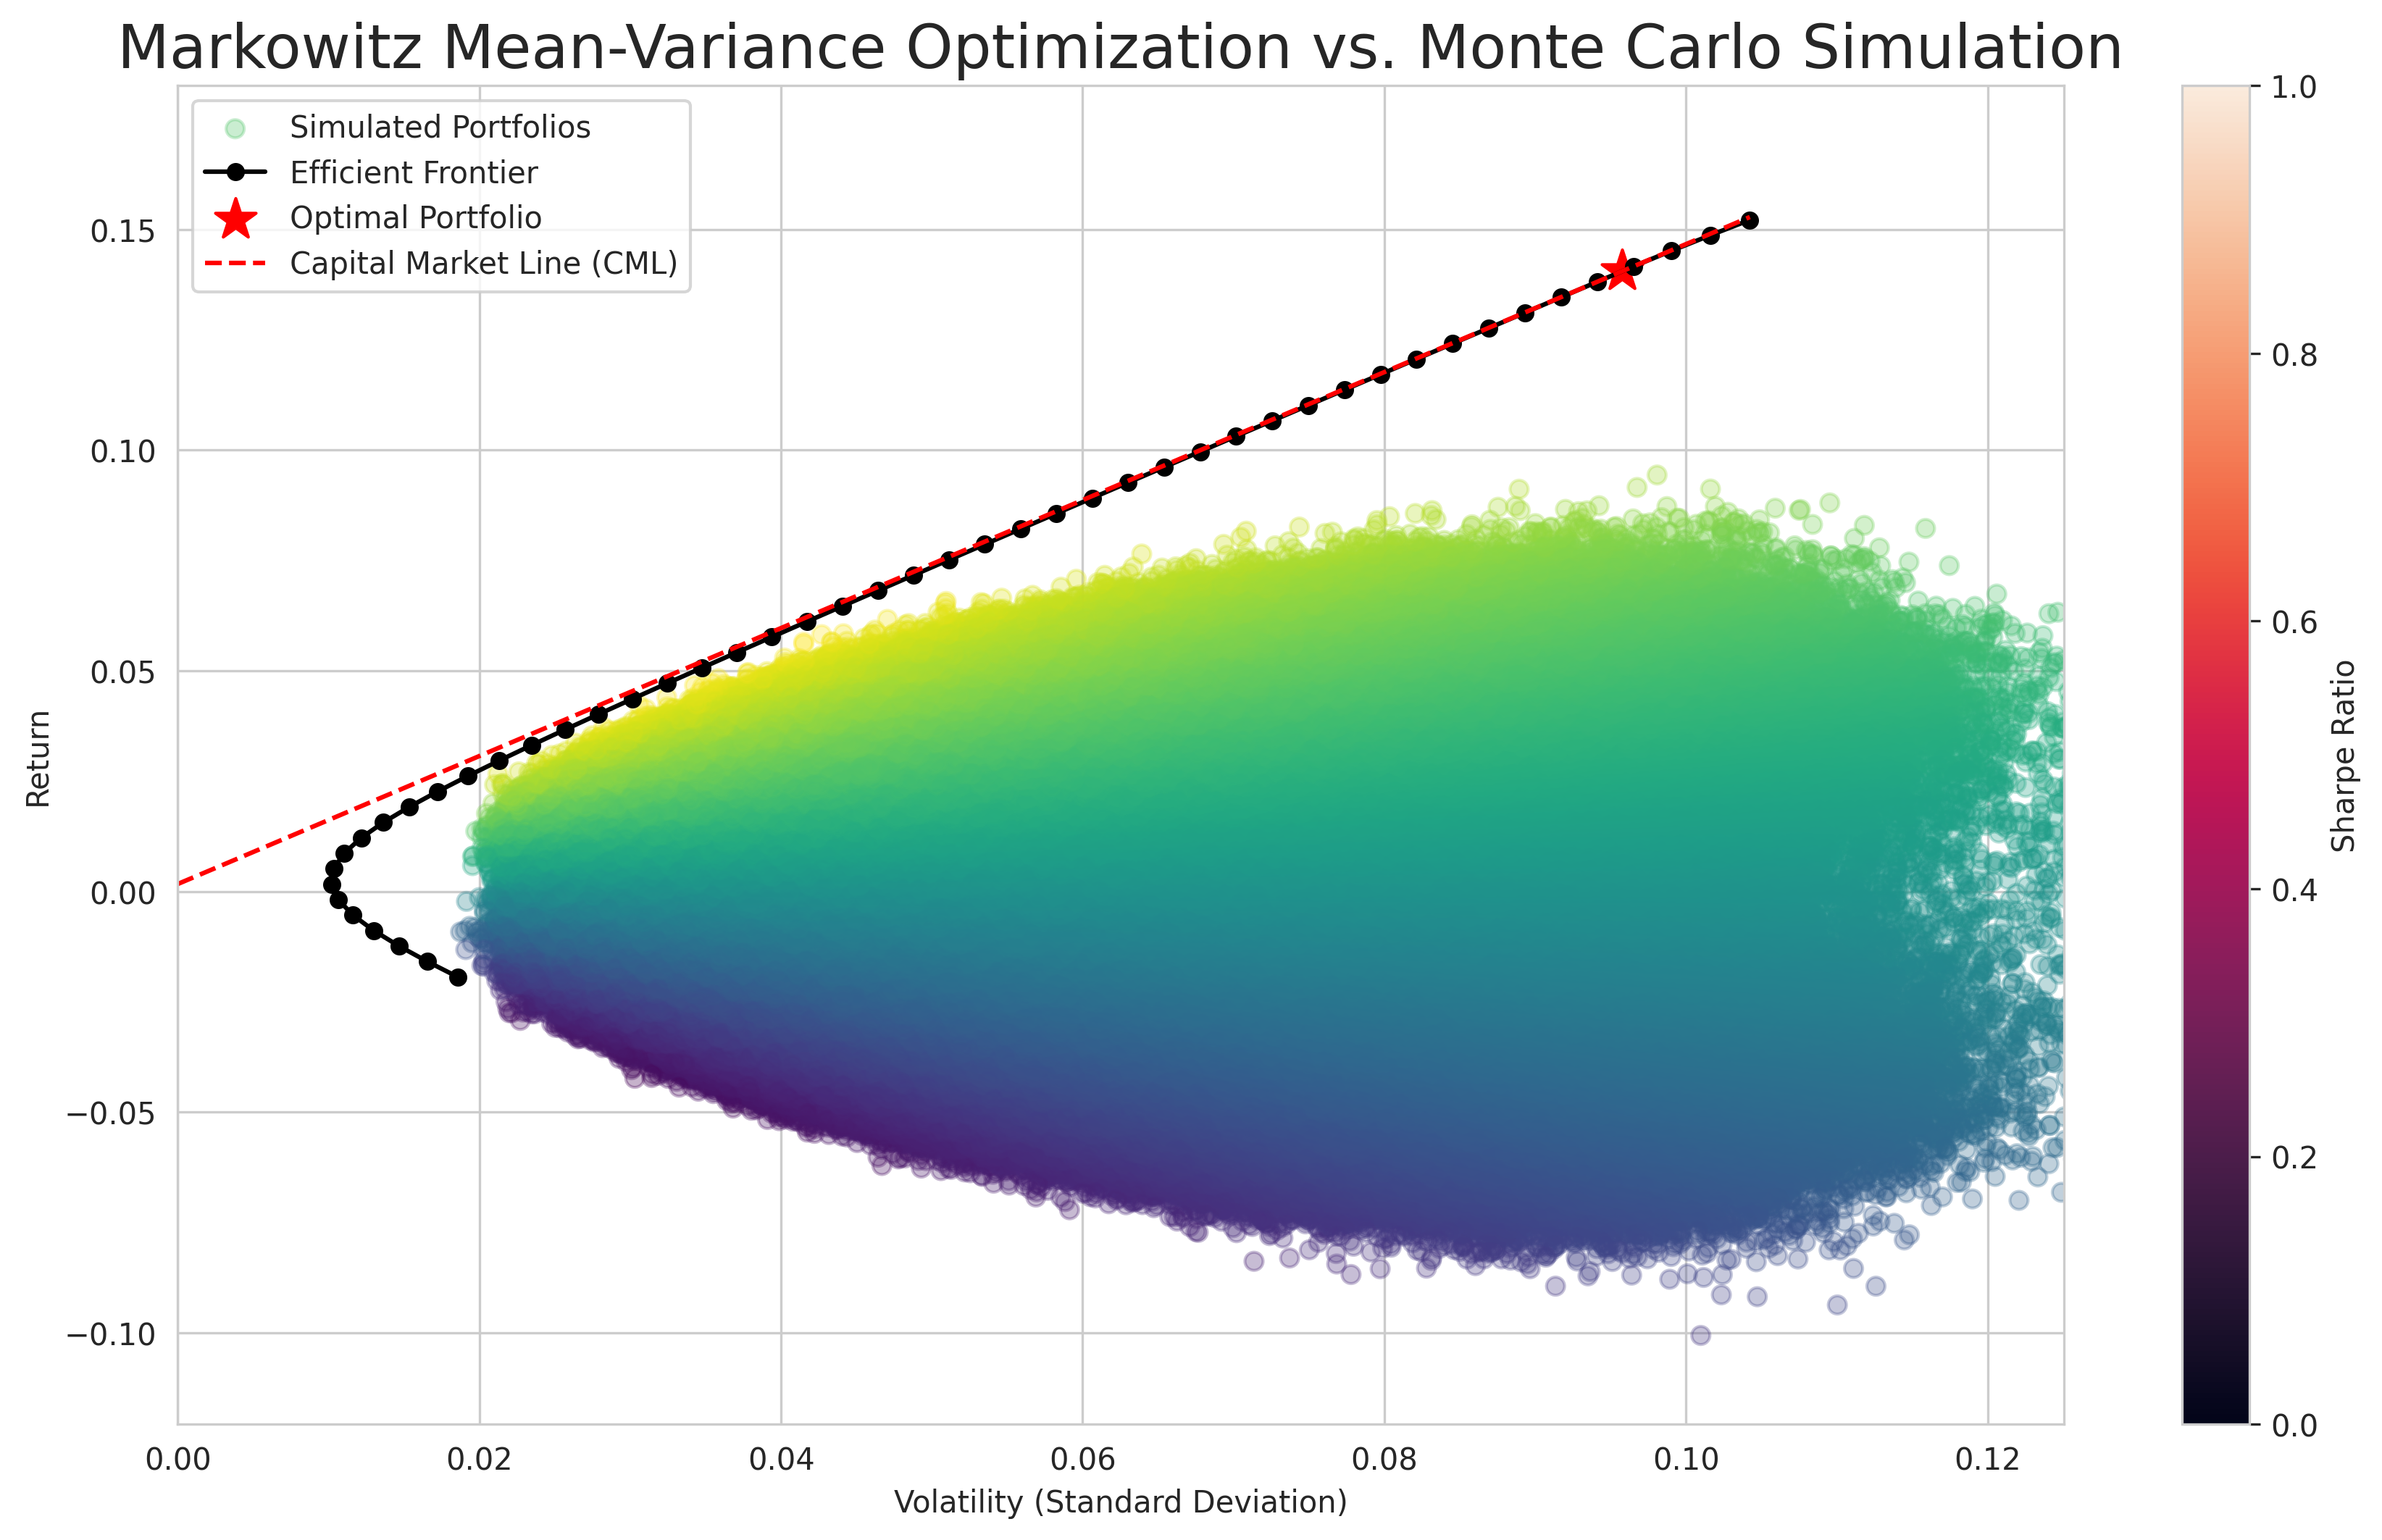

In [26]:
# Plotting the results
plt.figure(figsize=(14, 8), dpi=300)

# Scatter plot of Monte Carlo simulations
plt.scatter(simulated_volatilities, simulated_returns, c=simulated_sharpe_ratios, cmap='viridis', marker='o', alpha=0.3, label='Simulated Portfolios')

# Plot the Efficient Frontier
plt.plot(efficient_volatilities, efficient_returns, linestyle='-', color='black', marker='o', markersize=5, label='Efficient Frontier')

# Plot the optimal portfolio
plt.scatter(optimal_volatility, optimal_return, color='red', marker='*', s=200, label='Optimal Portfolio')

# Calculate the Capital Market Line (CML)
cml_x = np.linspace(0, max(efficient_volatilities), 100)
cml_y = risk_free_rate_periodic + cml_x * ((optimal_return - risk_free_rate_periodic) / optimal_volatility)
plt.plot(cml_x, cml_y, linestyle='--', color='red', label='Capital Market Line (CML)')

# Setting labels and title
plt.title('Markowitz Mean-Variance Optimization vs. Monte Carlo Simulation', fontsize=20)
plt.xlabel('Volatility (Standard Deviation)')
plt.ylabel('Return')
plt.colorbar(label='Sharpe Ratio')
plt.legend()

# Adjusting the axis range for better visualization
plt.xlim(0, max(efficient_volatilities) * 1.2)
plt.ylim(min(simulated_returns) * 1.2, max(efficient_returns) * 1.2)

plt.grid(True)
plt.show()

# 6. Rolling Window Optimization and Backtesting

In [27]:
# Read the CSV file
df3 = pd.read_csv('merged_close_data_final.csv', parse_dates=['Date'], index_col='Date')

# Reverse the order of the DataFrame (if data is not already in chronological order)
df3 = df3.iloc[::-1]

# Calculate monthly returns
monthly_returns2 = df3.pct_change().dropna()

# Define the risk-free rate (replace with actual value)
risk_free_rate = Risk_Free_Rate_calculated
periods_per_year = 12
risk_free_rate_periodic = (1 + risk_free_rate) ** (1 / periods_per_year) - 1

# Read the optimal portfolio weights from the entire time frame
optimal_portfolio_weights = optimal_portfolio

# --- Portfolio Optimization Functions ---
@njit
def portfolio_performance(weights, mean_returns, cov_matrix, periods_per_year):
    """
    Calculate the performance of a portfolio.

    Parameters:
    weights (numpy.ndarray): The weights of the assets in the portfolio.
    mean_returns (numpy.ndarray): The mean returns of the assets.
    cov_matrix (numpy.ndarray): The covariance matrix of the asset returns.
    periods_per_year (int): Number of periods in a year.

    Returns:
    std_dev (float): The standard deviation (risk) of the portfolio.
    returns (float): The total returns of the portfolio.
    """
    returns = np.sum(mean_returns * weights) * periods_per_year
    portfolio_variance = np.dot(weights.T, np.dot(cov_matrix, weights))
    if portfolio_variance <= 0:
        std_dev = 0.0  # Assign zero standard deviation if portfolio variance is non-positive
    else:
        std_dev = np.sqrt(portfolio_variance) * np.sqrt(periods_per_year)
    return std_dev, returns

@njit
def negative_sharpe_ratio(weights, mean_returns, cov_matrix, risk_free_rate, periods_per_year):
    """
    Calculate the negative Sharpe Ratio of a portfolio.

    Parameters:
    weights (numpy.ndarray): The weights of the assets in the portfolio.
    mean_returns (numpy.ndarray): The mean returns of the assets.
    cov_matrix (numpy.ndarray): The covariance matrix of the asset returns.
    risk_free_rate (float): The risk-free rate of return.
    periods_per_year (int): Number of periods in a year.

    Returns:
    negative_sharpe_ratio (float): The negative Sharpe Ratio of the portfolio.
    """
    p_var, p_ret = portfolio_performance(weights, mean_returns, cov_matrix, periods_per_year)
    if p_var == 0.0:
        return np.inf  # Return positive infinity if portfolio standard deviation is zero
    else:
        return -(p_ret - risk_free_rate) / p_var

# --- Rolling Optimization ---
def rolling_portfolio_optimization(returns, window_size, rebalance_period, optimal_weights):
    """
    Performs rolling portfolio optimization.

    Parameters:
    returns (pd.DataFrame): DataFrame of asset returns.
    window_size (int): Rolling window size in periods.
    rebalance_period (int): Rebalancing frequency in periods.
    optimal_weights (pd.Series): Optimal portfolio weights from the entire time frame.

    Returns:
    pd.DataFrame: DataFrame of portfolio weights over time.
    pd.DataFrame: DataFrame of backtesting metrics over time.
    """

    num_assets = returns.shape[1]
    portfolio_weights = []
    dates = []
    annualized_returns = []
    annualized_volatility = []
    sharpe_ratio = []

    # Handle initial periods where window size is larger than available data
    for i in range(0, window_size):
        window_returns = returns.iloc[:i + 1]

        # Convert to NumPy arrays within the loop for Numba compatibility
        mean_returns = window_returns.mean().values  # .values to get NumPy array
        cov_matrix = window_returns.cov().values  # .values to get NumPy array

        # Check if covariance matrix is ill-conditioned or singular
        try:
            if np.linalg.cond(cov_matrix) > 1e10 or np.linalg.det(cov_matrix) == 0:
                # Use the optimal portfolio weights from the entire time frame for ill-conditioned cases
                portfolio_weights.append(optimal_weights.values)
            else:
                # Use the optimal portfolio weights from the entire time frame for the initial periods
                portfolio_weights.append(optimal_weights.values)
        except np.linalg.LinAlgError:
            # Use the optimal portfolio weights from the entire time frame if LinAlgError occurs
            portfolio_weights.append(optimal_weights.values)

        # Calculate backtesting metrics for the initial periods
        portfolio_returns = (window_returns * optimal_weights.values).sum(axis=1)
        ann_ret = portfolio_returns.mean() * periods_per_year
        ann_vol = portfolio_returns.std() * np.sqrt(periods_per_year)
        sharpe = (ann_ret - risk_free_rate) / ann_vol if ann_vol != 0 else np.nan

        annualized_returns.append(ann_ret)
        annualized_volatility.append(ann_vol)
        sharpe_ratio.append(sharpe)

        dates.append(returns.index[i])

    # Perform rolling optimization for the remaining periods
    for i in range(window_size, len(returns), rebalance_period):
        window_returns = returns.iloc[i - window_size:i]

        # Convert to NumPy arrays within the loop for Numba compatibility
        mean_returns = window_returns.mean().values  # .values to get NumPy array
        cov_matrix = window_returns.cov().values  # .values to get NumPy array

        # Check if covariance matrix is ill-conditioned or singular
        try:
            if np.linalg.cond(cov_matrix) > 1e10 or np.linalg.det(cov_matrix) == 0:
                # Use the optimal portfolio weights from the entire time frame for ill-conditioned cases
                portfolio_weights.append(optimal_weights.values)
                dates.append(returns.index[i])

                # Calculate backtesting metrics for ill-conditioned cases
                portfolio_returns = (window_returns * optimal_weights.values).sum(axis=1)
                ann_ret = portfolio_returns.mean() * periods_per_year
                ann_vol = portfolio_returns.std() * np.sqrt(periods_per_year)
                sharpe = (ann_ret - risk_free_rate) / ann_vol if ann_vol != 0 else np.nan

                annualized_returns.append(ann_ret)
                annualized_volatility.append(ann_vol)
                sharpe_ratio.append(sharpe)

                continue
        except np.linalg.LinAlgError:
            # Use the optimal portfolio weights from the entire time frame if LinAlgError occurs
            portfolio_weights.append(optimal_weights.values)
            dates.append(returns.index[i])

            # Calculate backtesting metrics for LinAlgError cases
            portfolio_returns = (window_returns * optimal_weights.values).sum(axis=1)
            ann_ret = portfolio_returns.mean() * periods_per_year
            ann_vol = portfolio_returns.std() * np.sqrt(periods_per_year)
            sharpe = (ann_ret - risk_free_rate) / ann_vol if ann_vol != 0 else np.nan

            annualized_returns.append(ann_ret)
            annualized_volatility.append(ann_vol)
            sharpe_ratio.append(sharpe)

            continue

        # Constraints and bounds
        constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
        bounds = tuple((-1, 1) for asset in range(num_assets))

        # Initial guess using optimal portfolio weights from the entire time frame
        init_guess = optimal_weights.values

        # Optimize for maximum Sharpe Ratio
        opt_sharpe = sco.minimize(
            negative_sharpe_ratio,
            init_guess,
            args=(mean_returns, cov_matrix, risk_free_rate_periodic, periods_per_year),
            method='SLSQP',
            bounds=bounds,
            constraints=constraints,
        )

        # Store optimal weights and date
        portfolio_weights.append(opt_sharpe.x)
        dates.append(returns.index[i])

        # Calculate backtesting metrics for the rolling window
        portfolio_returns = (window_returns * opt_sharpe.x).sum(axis=1)
        ann_ret = portfolio_returns.mean() * periods_per_year
        ann_vol = portfolio_returns.std() * np.sqrt(periods_per_year)
        sharpe = (ann_ret - risk_free_rate) / ann_vol if ann_vol != 0 else np.nan

        annualized_returns.append(ann_ret)
        annualized_volatility.append(ann_vol)
        sharpe_ratio.append(sharpe)

    return (
        pd.DataFrame(portfolio_weights, index=dates, columns=returns.columns),
        pd.DataFrame({
            'Annualized Returns': annualized_returns,
            'Annualized Volatility': annualized_volatility,
            'Sharpe Ratio': sharpe_ratio
        }, index=dates)
    )

# --- Backtesting ---
def backtest_rolling_portfolio(returns, optimal_weights, metrics_df):
    """
    Backtests the performance of the rolling portfolio strategy.

    Parameters:
    returns (pd.DataFrame): DataFrame of asset returns.
    optimal_weights (pd.DataFrame): DataFrame of optimal portfolio weights over time.
    metrics_df (pd.DataFrame): DataFrame of backtesting metrics over time.

    Returns:
    pd.Series: Portfolio returns over time.
    """
    # Reindex the weights DataFrame to match the returns DataFrame
    optimal_weights = optimal_weights.reindex(returns.index, method='ffill')

    # Calculate portfolio returns
    portfolio_returns = (returns * optimal_weights).sum(axis=1)
    
    return portfolio_returns, metrics_df

# --- Main Execution ---
window_size = 36  # Months
rebalance_period = 1  # Rebalance monthly

optimal_weights_over_time, metrics_df = rolling_portfolio_optimization(
    monthly_returns2, window_size, rebalance_period, optimal_portfolio_weights['Weight']
)

# Backtesting
portfolio_returns, metrics_df = backtest_rolling_portfolio(monthly_returns2, optimal_weights_over_time, metrics_df)

/home/jacopo/.local/lib/python3.10/site-packages/pandas/core/frame.py:11211: RuntimeWarning: Degrees of freedom <= 0 for slice
  base_cov = np.cov(mat.T, ddof=ddof)
/home/jacopo/.local/lib/python3.10/site-packages/numpy/lib/function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/home/jacopo/.local/lib/python3.10/site-packages/numpy/lib/function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


## Results Rolling Window Backtesting

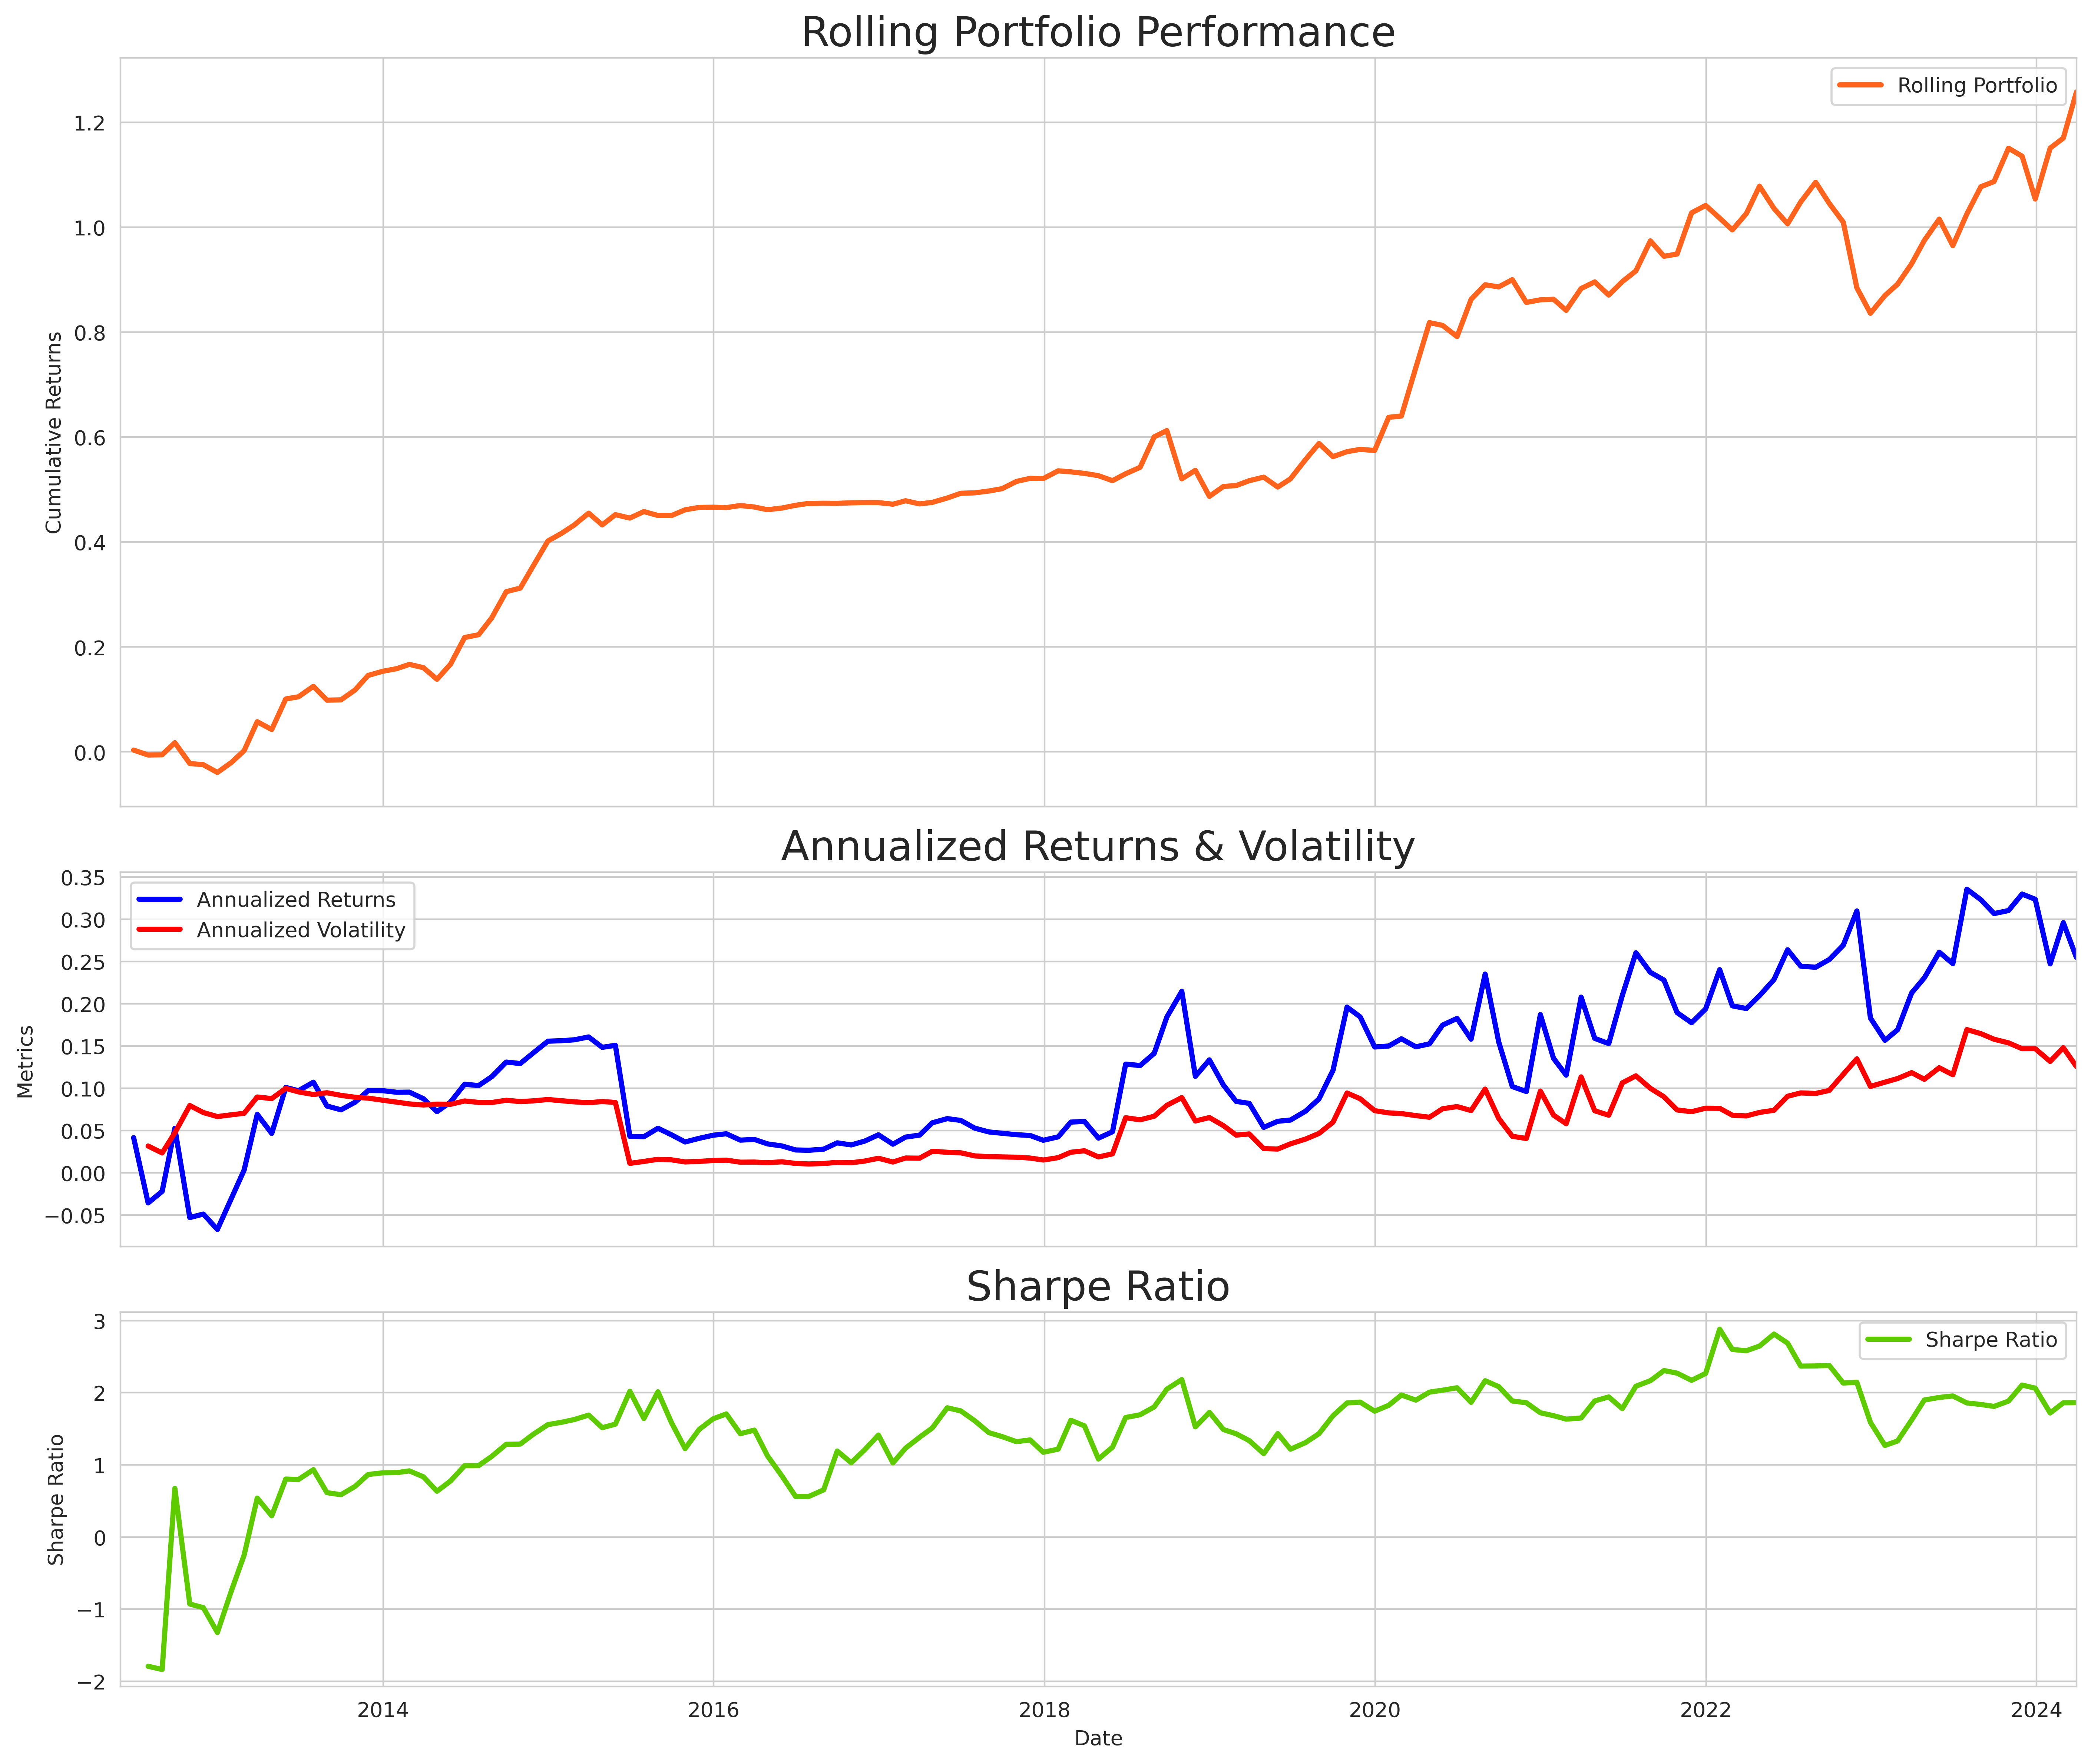

In [28]:
# --- Visualization ---
fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, ncols=1, figsize=(14, 12), dpi=400, sharex=True, gridspec_kw={'height_ratios': [2, 1, 1]})

# Cumulative returns
ax1.plot(portfolio_returns.cumsum(), label='Rolling Portfolio', linewidth=2.5, color='#ff631c')
ax1.set_xlim(df3.index[0], df3.index[-1])  # Set x-axis limits to match data range
ax1.set_title('Rolling Portfolio Performance', fontsize=20)
ax1.set_ylabel('Cumulative Returns')
ax1.legend()

# Annualized returns and annualized volatility
ax2.plot(metrics_df.index, metrics_df['Annualized Returns'], label='Annualized Returns', linewidth=2.5, color='blue')
ax2.plot(metrics_df.index, metrics_df['Annualized Volatility'], label='Annualized Volatility', linewidth=2.5, color='red')
ax2.set_xlim(df3.index[0], df3.index[-1])  # Set x-axis limits to match data range
ax2.set_title('Annualized Returns & Volatility', fontsize=20)
ax2.set_ylabel('Metrics')
ax2.legend()

# Sharpe ratio
ax3.plot(metrics_df.index, metrics_df['Sharpe Ratio'], label='Sharpe Ratio', linewidth=2.5, color='#5ecb00')
ax3.set_xlim(df3.index[0], df3.index[-1])  # Set x-axis limits to match data range
ax3.set_title('Sharpe Ratio', fontsize=20)
ax3.set_xlabel('Date')
ax3.set_ylabel('Sharpe Ratio')
ax3.legend()

plt.grid(True)
plt.tight_layout()
plt.show()